# Практическая работа №1: Основы анализа и моделирования социальных сетей
Выполнила студентка гр. 0381 Березовская Валерия. Вариант №2

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

###Основные определения в теории сетей:<br>

**Сеть** $-$ все, что окружает каждого человека, личные взаимосвязи.<br>
**Актор** $-$ дискретная индивидуальная, корпоративная или коллективная социальная единица.<br>
**Группа** $-$ совокупность всех акторов, связи между которыми должны быть изучены.<br>
**Отношение** $-$ совокупность связей определенного вида между акторами.<br>
**Социальная сеть** $-$ объект, представляющий собой совокупность конечного набора акторов и отношения, определенных на нем.<br>
<br>
Способы математического представления сетей:
* **С помощью графа:**  <br>
>Граф $-$ модель социальной сети с ненаправленным дихотомоческим отношением, т. е. связь или присутствует, или отсутствует между каждой парой акторов. 
* **С помощью социоматрицы** <br>
>Социоматрица $-$ матрица $𝓧$ размерности $g \times g$ , описывающая смежные узлы в сети, где $g - $ количество акторов.<br>
* **Алгебраическое**.<br>

###Числовые характеристики сети:<br>
* **Размер сети** $-$ количество акторов в сети.<br>
* **Плотность** $-$ доля имеющихся связей к общему возможному числу связей.<br>
Для неориентированных сетей: $Δ = \frac {𝐿} {C_{g}^{2}} = \frac {2𝐿} {g * (g - 1)}$ , $𝐿$ $-$ количество связей, $g$ $-$ число акторов в сети.<br>
Для ориентированных сетей: $Δ = \frac {𝐿} {A_{g}^{2}} = \frac {𝐿} {g * (g - 1)}$ , $𝐿$ $-$ количество связей, $g$ $-$ число акторов в сети.<br>
* **Компонента** $-$ подгруппа, в которой все акторы связаны друг с другом прямо или косвенно. (Компонента связности).
* **Диаметр** полной сети $-$ наибольшая длина любого из кратчайших путей между парами узлов.<br>
* **Степень узла** $-$ число связей инцидентных узлу $n_i$.<br>
Для неориентированных сетей: $d(n_i)$<br>
Для ориентированных: $d_I(n_i)$ $-$ степень входящих ребер (Input), $d_O(n_i)$ $-$ степень исходящих ребер (Output).<br>
Средняя степень узлов: $\overline{d} = \frac {1} {g} * \sum_{i=1}^{g} {d(n_i)}$, $g$ $-$ число акторов в сети.<br>
Дисперсия средней степени: $S_{D}^{2} = \frac {1} {g} * \sum_{i=1}^{g} {(d(n_i) - \overline{d})^2}$.<br>
(Для ориентированных графов средняя степень и дисперсия рассчитываются отдельно для входящих и исходящих ребер.)
* **Коэффициент кластеризации** $-$ характеристика тенденции к созданию закрытых треугольников (триад, т. е. таких структур, где между акторами есть все три связи). Этот коэффициент измеряется с помощью транзитивности.<br>
* **Транзитивность** $-$ доля закрытых треугольников (триад) по отношению к общему числу открытых и закрытых треугольников (триады, где 2 или 3 связи).<br>


### Алгоритмы укладки


**Силовые алгоритмы укладки сетей** $-$ итеративные алгоритмы, основанные на уменьшении общей энергии сети, гд энергия может быть определена различными способами.
1. Алгоритм Фрюхтермана-Рейндгольда<br>
  *Вершины* $-$ атомные частицы или небесные тела, которорые отталкиваются или притягиваются. Действуют силы притяжения и отталкиваниния:
>$F_a(d) = \frac {d^2} {k}$ ; $F_r(d) = \frac {-k^2} {d}$ , $d$ - расстояние между вершинами (евклидово);<br>
>$k = C \sqrt {\frac {area} {\#V}}$ , $area$ - площадь окна, $C$ - константа, $\#V$ - количество вершин в сети. 

  *Температура*: начинается с какого-то значения и падает до 0.<br> Непосредственно управляет процессом смещения вершин. При уменьшении температуры вершины стабилизируются. <br>
  *Сложность*: $O(\#E+(\#V)^2)$.<br>
  На каждой итерации алгоритма рассчитываются силы отталкивания и притяжения, на их рассчет влияет значение температуры, а также снижается температура $t$, значение которой начинается с $0.1*area$ и линейно уменьшается до $0$.
2. Алгоритм Камада-Каваи<br>
Узлы соединены пружинами. Необходимо настроить пружинную сеть таким образом, чтобы минимальная энергия системы соответствовала минимальной разнице между геометрическим расстоянием и графовым расстоянием между узлами (т. е. найти минимум энергии системы).<br>
Сила пружины рассчитывается как:
> $k_{ij} = \frac {const} {d_{ij}^2}$ , где $d_{ij}$ - кратчайшее расстояние между вершинами $i$ и $j$.<br>

  Энергия пружинной системы:
> $E=\sum_{i=1}^{n-1}\sum_{j=i+1}^n \frac {1} {2} k_{ij} (|p_i-p_j| - l_{ij})^2 \ , |p_i-p_j| - норма.$

  Задача сводится к нахождению таких точек $(x_i,y_i)$, который минимизируют энергию $E$. Фиксируется некоторое значение $ɛ$. На каждом шаге выбирается максимальное значение $\Delta_m = \sqrt {\left(\frac {σE} {σx_m}\right)^2 + \left(\frac {σE} {σy_m}\right)^2}$. Далее вычисляются $\delta x$ и $\delta y$ решением системы линейных уравнений, рассчитываются новые $x_m$ и $y_m$, цикл повторяется пока $\Delta_m > ε$.<br>

###Описание и анализ сетей:<br>
Актор считается **важным**, если связи актора делают видимым для других участников сети.<br>
<br>
Меры важности:<br>
**Центральность** $-$ мера, характеризующая актор с наибольшим количеством связей (прямых или косвеннных). Обозн.: $C_A(n_i)$ , $i=1,..,g$ .<br>
**Централизация** $-$ мера, характеризующая группу акторов. Обозн.: $C_A$ . $C_A = \frac {\sum_{i=1}^g [C_A(n^*)-C_A(n_i)]} {max \sum_{i=1}^g [C_A(n^*)-C_A(n_i)]}$ , $C_A(n^*) = max_i C_A(n_i)$ - максимальное значение центральности.<br>
* Центральность *по степени* - степень каждого актора: $C_D(n_i) = deg(n_i)$ . <br>
Нормированная центральность по степени: $C_D'(n_i) = \frac {deg(n_i)} {g-1}$<br>
Централизация по степени: $C_D = \frac {\sum_{i=1}^g [C_D(n^*)-C_D(n_i)]} {max \sum_{i=1}^g [C_D(n^*)-C_D(n_i)]} = \frac {\sum_{i=1}^g [C_D(n^*)-C_D(n_i)]} {(g-1)(g-2)}$ .

* Центральность *по близости* $-$ более важными считаются узлы наиболее близкие к остальным узлам сети: $C_C(n_i) = (\sum_{i=1}^g d(n_i, n_j))^-1$ , $d(n_i, n_j)$ - расстояние между двумя узлами.<br>
Нормированная центральность по близости: $C_c'(n_i) = \frac {g-1} {\sum_{i=1}^g d(n_i, n_j)} = (g-1)C_C(n_i)$ .<br>
Централизация по близости: $C_C = \frac {\sum_{i=1}^g [C_C(n^*)-C_C(n_i)]} {(g-1)(g-2)/(2g-3)}$ .

* Центральность *по посредничеству* $-$ характеризует насколько важную роль данный узел играет на пути "между" парами узлов в сети, в том смысле, что пути между другими узлыми должны проходить через данный узел $n_i$ : $C_B(n_i) = \frac {\sum_{j<k} g_{jk}(n_i)} {g_{jk}} , n_i \ne j,k$ . $g_{ij}(n_i)$ - количество геодезичских расстояний (кратчайшие пути) между узлами $j$ и $k$, который включают узел $i$, $g_{jk}$ - геодезическое расстояние между $j$ и $k$.<br>
Нормированная центральность по посредничеству: $C_B'(n_i) = \frac {C_B(n_i)} {C_2^{g-1}}$ .<br>
Централизация по посредничеству: $C_B = \frac {2\sum_{i=1}^g [C_B(n^*)-C_B(n_i)]} {(g-1)^2(g-2)} = \frac {\sum_{i=1}^g [C_B(n^*)-C_B(n_i)]} {g-1}$ .

* Центральность *по информации* $-$ обобщает все меры центральности, учитываются все комбинированные пути от одного актира к другому: $C_I(n_i)=\frac {1} {c_{ii}+(T-2R)/g}$ , $T=\sum_{i=1}^g c_{ii} = tr C$ , $R = \sum_{j=1}^g c_{ij}$ , при этом создается матрица $A$ размера $g\times g$ с элементами $\{a_{ij}\}$ : $a_{ij} = 1\ +$ сумма значений всех линий, инцидентных с $n_i$ . $a_{ij} = \left\{ \begin{array}{cl}1 & \text {если узлы $n_i$ и $n_j$ не инцидентны}\\ 1-x_{ij} & \text {если узлы $n_i$ и $n_j$ инцидентны} \end{array} \right.$ ,<br> $C=A^{-1}$ - матрица с элементами $\{c_{ij}\}$ . <br>
Нормированная централизация по информации: $C_I'=\frac {C_I(n_i)} {\sum_i C_I(n_i)}$ .<br>
Централизация по информации (можно вычислить как дисперсию индексов информации актора): $S_I^2 = \frac {1} {g} \sum_{i=1}^g (C_I'(n_i) - \overline {C_I})^2$ , $\overline {C_I} = \frac {1} {g} \sum_i C_I(n_i)$ . <br>
<br>
 
**Престиж** $-$ мера, характеризующая актор с наибольшим числом входящих связей. Обозн.: $P_A(n_i)\ , i=1,..,g$ .<br>
* Престиж по степени - входящая степень каждого узла: $P_D(n_i) = d_I(n_i) = x_{+i}\ , d_I$ $-$ входящие (Input). <br>
Нормированный престиж по степени: $P_D' = \frac {X_{+i}} {g-1}$ .<br> 
<br>

* Престиж по близости $-$ определяет насколько все акторы близки к заданному по расстоянию до него: $P_P(n_i) = \frac {\#I_i/(g-1)} {\sum_{j: n_j \in I_i} d(n_j, n_i) / \#I_i}~$,$~d(n_j, n_i)$ $-$ растояние пути между двумя узлами.<br>

<br>

**Мост** $-$ ребро, при удалении которого одна компонента разделяется на две.

**Точка сочленения** $-$ узел, при удалении которого увеличивается число компонент связности.


## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [ ]:
install.packages("devtools")
install.packages('network')
install.packages('sna')
install.packages('igraph')

In [ ]:
devtools::install_github("DougLuke/UserNetR")

In [ ]:
library(UserNetR)
library(network)
library(sna)
library(igraph)

### Часть 1

1.1 Из файла florentine_marital.csv  извлечь социоматрицу и вывести полученную социоматрицу на экран.

In [4]:
marital <- read.csv('/content/sample_data/florentine_marital.csv', comment.char = "#")
netmat1 <- data.matrix(marital,  rownames.force = NA)
socio <- as.sociomatrix(netmat1)
socio

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


1.2 Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [5]:
net <- as.network(netmat1, matrix.type = "adjacency")
edgelist <- as.edgelist(net)
head(edgelist, 5)

1,9
2,6
2,7
2,9
3,5


1.3. Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).

In [6]:
rownames(socio) <- colnames(marital)
colnames(socio) <- colnames(marital)
socio

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


1.4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

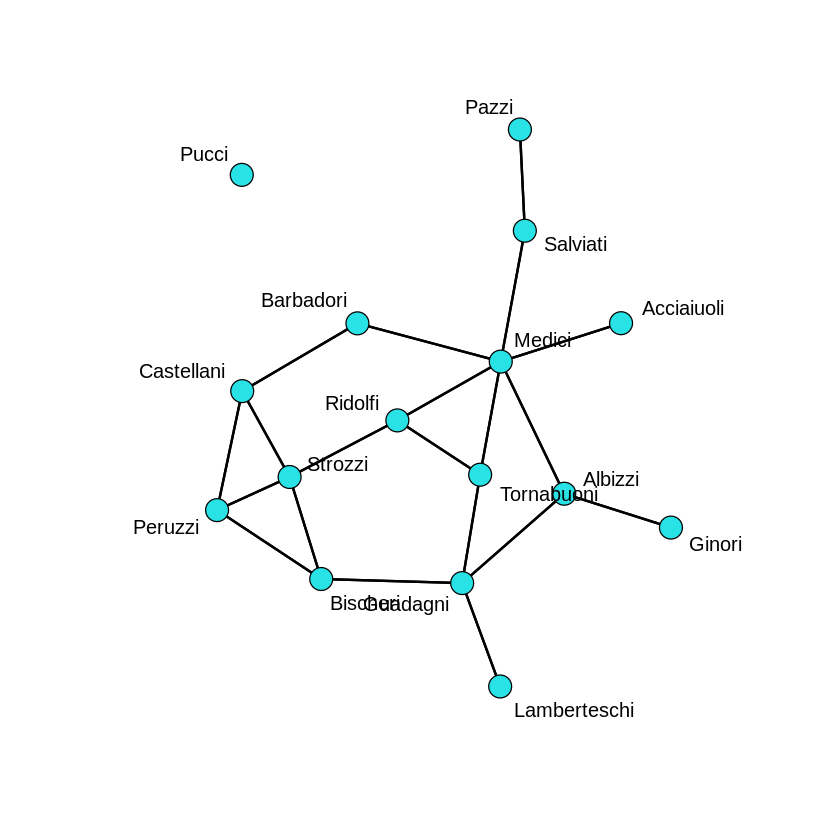

In [7]:
nodes <- colnames(marital)
gl <- gplot(net, vertex.col = 5, displaylabels = TRUE, gmode= "graph") #gplot(data, colour of vertex, vertex names display, type of graph)

1.5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.


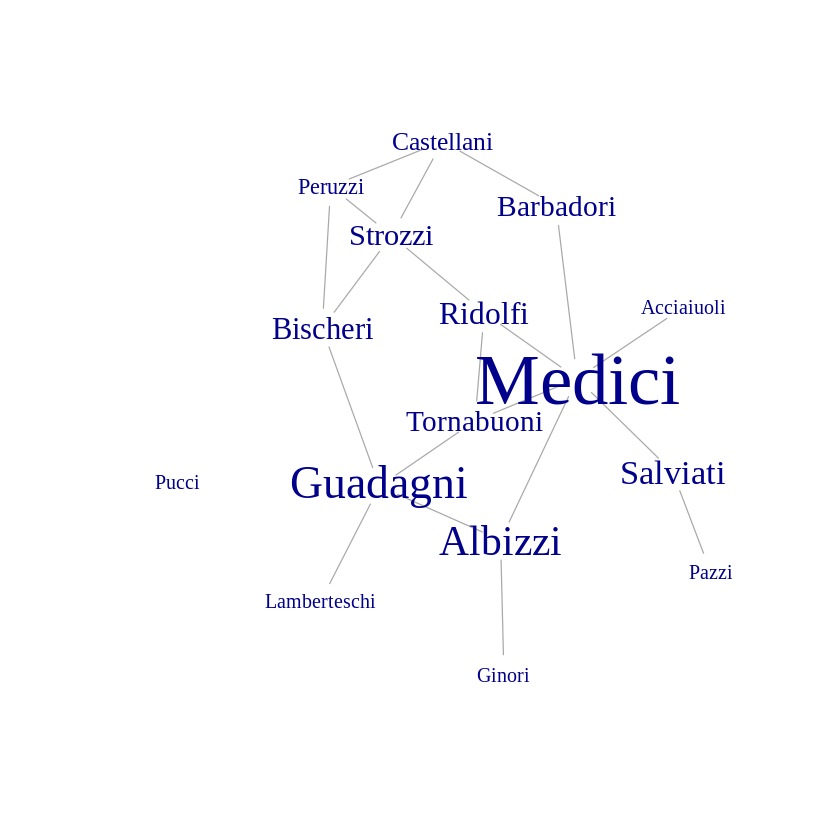

In [8]:
# par(mfrow = c(1,2))
g <- graph_from_adjacency_matrix(socio, mode="undirected", weighted=TRUE)

lay <- layout_with_fr(g)#fruchtermanreingold

cb <- betweenness(g)
plot(g, layout=lay, vertex.label.cex=1+cb/18, vertex.shape="none")

# plot(g, edge.width=log2(E(g)$weight)+3, layout=lay, vertex.color="lightblue", vertex.size = 15, vertex.label.cex=1.2, edge.len = 22) #diff. version

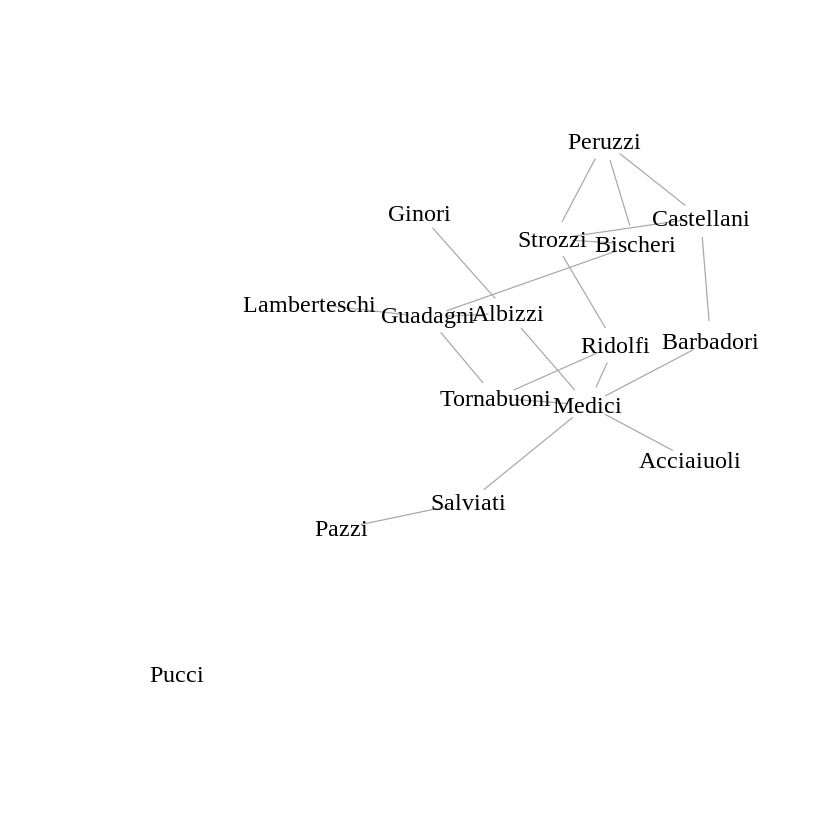

In [9]:
#The Kamada-Kawai layout algorithm
layk <-layout_with_kk(g)
plot(g, layout=layk, ertex.label.cex=1+cb/2, vertex.shape="none", vertex.label.color="black", vertex.label.cex=1.2)
# plot(g, edge.width=log2(E(g)$weight)+3, layout=layk, vertex.color="lightgrey", vertex.size = 15, vertex.label.cex=1.2, edge.len = 22, vertex.label.color = "black" )

**Сравнение укладок:**

 В алгоритме Камада-Каваи укладка вершин получается более плотная, так как притяжение или отталкивание между вершинами зависит только от разницы между геометрическим и графовым расстоянием,а в алгоритме Фрюхтермана-Рейнгольда эти силы раздельные.

1.6.Вывести «описательную сводку» сети.

In [10]:
summary(net, print.adj = FALSE)

Network attributes:
  vertices = 16
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 40 
   missing edges = 0 
   non-missing edges = 40 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

1.7. Вычислить «пятичисловую сводку» сети:
> *   Вычислить размер сети
> *    Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
> *   Определить число компонент в сети по графу. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.
> *   Вычислить диаметр сети. Сделать выводы
> *   Вычислить коэффициент кластеризации. Сделать выводы.


<br>

*Плотность*: $\frac{20}{\binom{16}{2}} = 0.167...$
<br>

*Компоненты*: 2, состоящие из 1 и 15 вершин.

Для нахождения компонент связанности была использована**components(igraph)**, встроенная функция, возвращающая три поля(**membership** $-$ принадлежность каждого актора к определённой компоненте связанности, **csize** $-$ размер каждой компоненты связанности, **no** $-$ количество компонент связанности.)

Для нахождения диаметра графа можно вопользоваться 2 способами:


1.   Встроенной функцией diameter(g, directed = F)
2.   Посчитать через геодезические расстояния, так как по определению диаметр - максимальное геодезическое расстояние в графе.



In [16]:
## Пятичисловая сводка:
## Размер
print("Размер сети:")
network.size(net)

## Плотность
print("Плотность:")
gden(net)

## Компоненты
print("Компоненты:")
num_comp <- components(g) 
num_comp$no

## Диаметр сети
print("Диаметр сети:")
# lgc <- component.largest(net, result = "graph")
# gd <- geodist(lgc)
# max(gd$gdist)
diameter(g, directed = F)  # функции эквивалентны полностью

## Коэффициент кластеризации
print("Коэффициент кластеризации:")
gtrans(net, mode = "graph")

[1] "Размер сети:"


[1] 16

[1] "Плотность:"


[1] 0.1666667

[1] "Компоненты:"


[1] 2

[1] "Диаметр сети:"


[1] 5

[1] "Коэффициент кластеризации:"


[1] 0.1914894

**Вывод из пятичисловой сводки:**
<br>
Так как плотность сети достаточно маленькая, можно заключить, что в сети не так много связей между акторами.

В сети есть 2 компоненты, и из этого следует, что 15 семей прямо или косвенно связаны друг с другом. Pucci единственная ни с кем не связана.

Компонента из 15 вершин имеет диаметр сети равен 5. Это означает,  что одна семья связана с другой через не более чем 5 "промежуточных" семей.

Из значения коэффициента кластеризации можно заключить, что только у 20% семей есть транзитивная связь.

1.8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [ ]:
## Cредняя степень узлов 
avg <- sum(degree(g))/gorder(g)
avg

##  Дисперсиz
D <- (1/(gorder(g)))*(sum((degree(g) - avg)^2))#по лекции, что-то здесь не так var(V(g))#встроенная 22.66
D


[1] 2.5

[1] 2.125

Средняя степень показывает с каким количеством имеет прямую связь каждый актор в среднем. В рассмотренной сети каждая семья связана в среднем с $2-3$ другими семьями, и разброс этого количества 2.125, т.е. дисперсия.


1.9. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин: 

$n_{i}$| $C'_{D}$ | $C'_{C}$ | $C'_{B}$| $C'_{I}$
-------------------|------------------|------------------|------------------|------------------|
Acciaiuoli| 0.071     |0.368   | 0         | 0.05     |
Albizzi   | 0.214     |0.482   | 0.212     | 0.074     |
Barbadori | 0.143     |0.437   | 0.093     | 0.068    |
Bischeri  | 0.214     |0.4     | 0.104     | 0.074    |
Castellani| 0.214     |0.388   | 0.054     | 0.071     |
Ginori    | 0.072     |0.333   | 0.255     | 0.043     |
Guadagni  | 0.286     |0.466   | 0.521     | 0.082     |
Lamberteschi|0.071    |0.325   | 0.022     | 0.046     |
Medici    | 0.428     |0.56    | 0.113     | 0.095     |
Pazzi     | 0.071     |0.286   | 0.142     | 0.035    |
Peruzzi   | 0.214     |0.368   | 0.102     | 0.069    |
Ridolfi   | 0.214     |0.5     | 0.114     | 0.08     |
Salviati  | 0.143     |0.388   | 0.143     | 0.053    |
Strozzi   | 0.286     |0.437   | 0.103     | 0.078     |
Tornabuoni| 0.214     |0.483   | 0.092     | 0.08   |

Из таблицы следует, что самым важным актором по всем параметрам является семья Medici.

In [ ]:
nop <- socio[-12, ][,-12] #without pucci 
nopgraph<-graph.adjacency(nop, mode = "undirected")
print("C'_D")
centralization.degree(g)$res/14
print("C'_C")
C_C <-centralization.closeness(nopgraph)$res
print(C_C)
print("C'_B:")
C_B <-(centralization.betweenness(nopgraph)$res)/91 #91 - avg
print(C_B)
print("C'_I:")
C_I <- infocent(nop)/(sum(infocent(nop)))
print(C_I)

1.10. Вычислить значение централизации для каждой меры. Сделать выводы.


In [ ]:
degC <- centralization.degree(g)$res #центр. по степени не нормир.
resC_D <- sum(max(degC)- degC)/ ((gorder(g)-1)*(gorder(g)-2))
resC_C <- sum(max(C_C)- C_C)/ (((gorder(g)-1)*(gorder(g)-2))/(gorder(g)*2-3))
resC_B <-sum(max(C_B)- C_B)/(gorder(g)-1)
resC_I <- sum(C_I - sum(infocent(nop)))^2/gorder(g)
data.frame("C_D" = resC_D, "C_C" = resC_C, "C_B" = resC_B, "C_I" = resC_I)

C_D,C_C,C_B,C_I
<dbl>,<dbl>,<dbl>,<dbl>
0.2666667,0.3001593,0.4076923,1743.046


Централизация по степени, близости и информации у всех акторов не сильно отличается, что указывает на то, что между семьями с наибольшим количеством связей и остальными различие в количестве связей не слишком большое.

1.11. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте
их самостоятельно). Построить график сети, на котором выделены
точки сочленения и мосты
<br>

Точки сочленения: Albizzi,  Guadagni, Medici,   Salviati
<br>
Мосты: 
1. Albizzi $-$ Ginori     
2.  Guadagni $-$ Lamberteschi  
3. Pazzi  $-$ Salviati  
4. Medici $-$ Salviati     
5. Acciaiuoli $-$ Medici 

+ 5/20 edges from 3314e3d (vertex names):
[1] Albizzi   --Ginori       Guadagni  --Lamberteschi Pazzi     --Salviati    
[4] Medici    --Salviati     Acciaiuoli--Medici      

+ 4/16 vertices, named, from 3314e3d:
[1] Albizzi  Guadagni Medici   Salviati

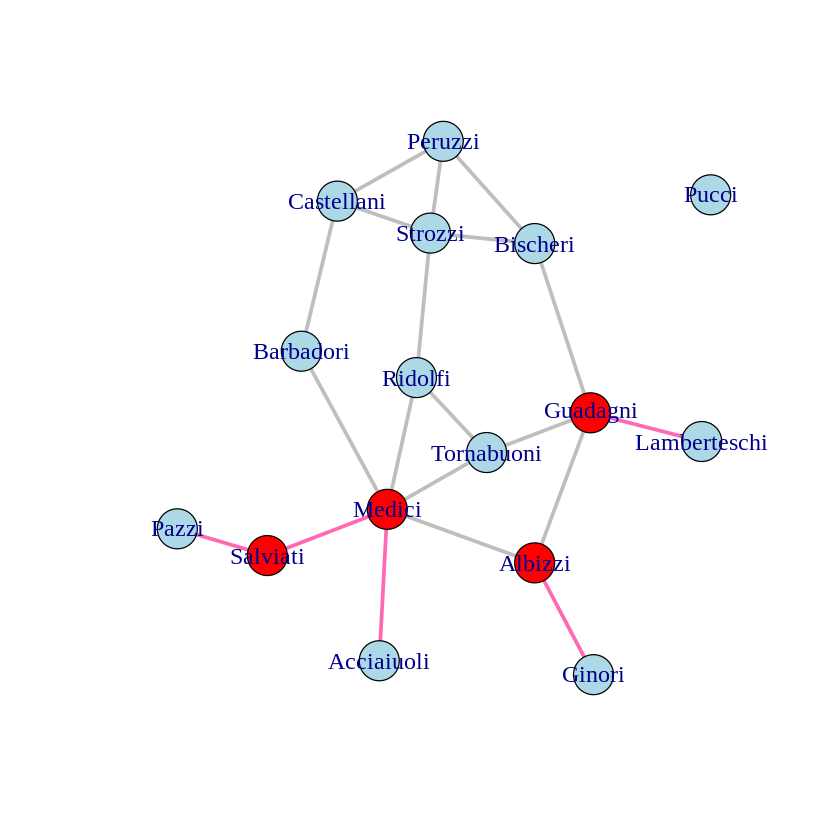

In [ ]:
bridges(g)
articulation_points(g)
V(g)$color <- "lightblue"
V(g)$color[ articulation.points(g) ] <- "red" #paint articul. points
E(g)$color <- "grey"
E(g)$color[bridges(g)] <- "hotpink"
plot(g, edge.width=log2(E(g)$weight)+3, layout=lay, vertex.color=V(g)$color, vertex.size = 15, vertex.label.cex=1.2)



### Часть 2

2.1. Из файла krackhardt_friendship.csv  извлечь социоматрицу и вывести полученную социоматрицу на экран.

In [17]:
friendship <- read.csv('/content/sample_data/krackhardt_friendship.csv',skip=2,header=FALSE, sep=",")
netmat2 <- data.matrix(friendship)
socioF <- as.sociomatrix(netmat2, matrix.type = "adjacency")
socioF

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,⋯,1,0,0,0,1,1,0,0,0,0
0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,1,0,1,0,1
0,1,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,1,0,0,1,1,0,⋯,1,0,0,0,1,0,0,0,1,0


2.2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [18]:
net2 <- as.network(netmat2)
edgelistf <- as.edgelist(net2)
head(edgelistf, 5)

1,2
1,4
1,8
1,12
1,16


2.3. Присвоить имена столбцам и строкам социоматрицы

In [19]:
rownames(socioF) <- colnames(friendship) 
colnames(socioF) <- colnames(friendship)
socioF

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,0,1,0,1,0,0,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,0
V2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
V3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
V4,1,1,0,0,0,0,0,1,0,0,⋯,1,0,0,0,1,1,0,0,0,0
V5,0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,1,0,1,0,1
V6,0,1,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,1,0,0,0,1
V7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
V8,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
V9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
V10,0,0,1,0,1,0,0,1,1,0,⋯,1,0,0,0,1,0,0,0,1,0


2.4. С помощью соответствующих функций по полученной социоматрице построить направленную сеть. Объяснить параметры, передаваемые в функцию.

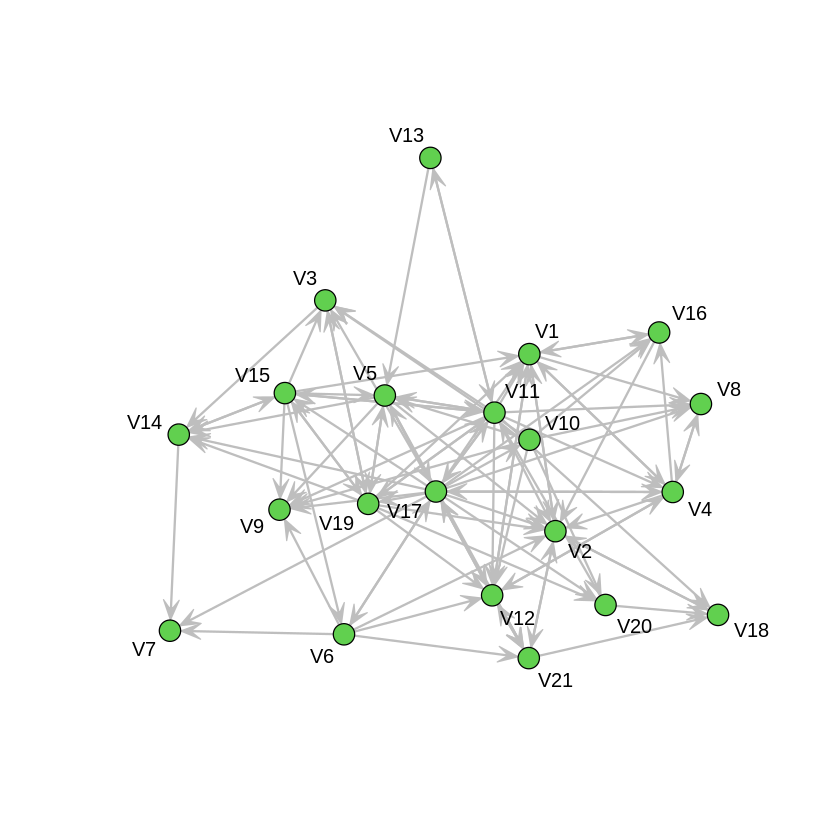

In [20]:
nodes <- colnames(friendship)
glf <- gplot(net2, vertex.col = 3, displaylabels = TRUE, gmode= "directed", edge.col = "grey") #gplot(data, colour of vertex, vertex names display, type of graph)

2.5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи.


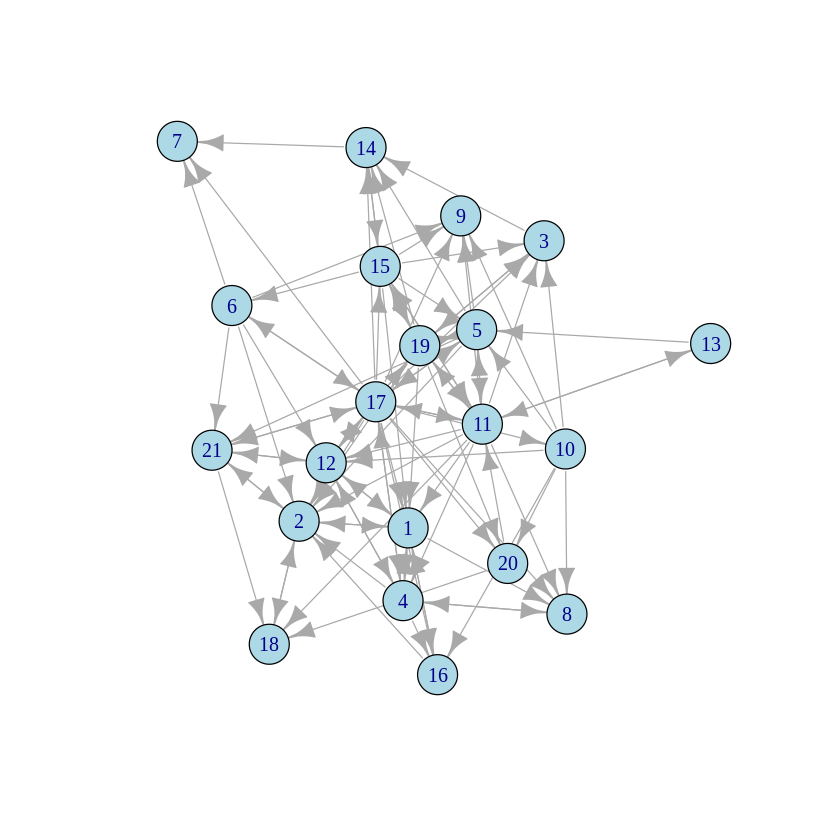

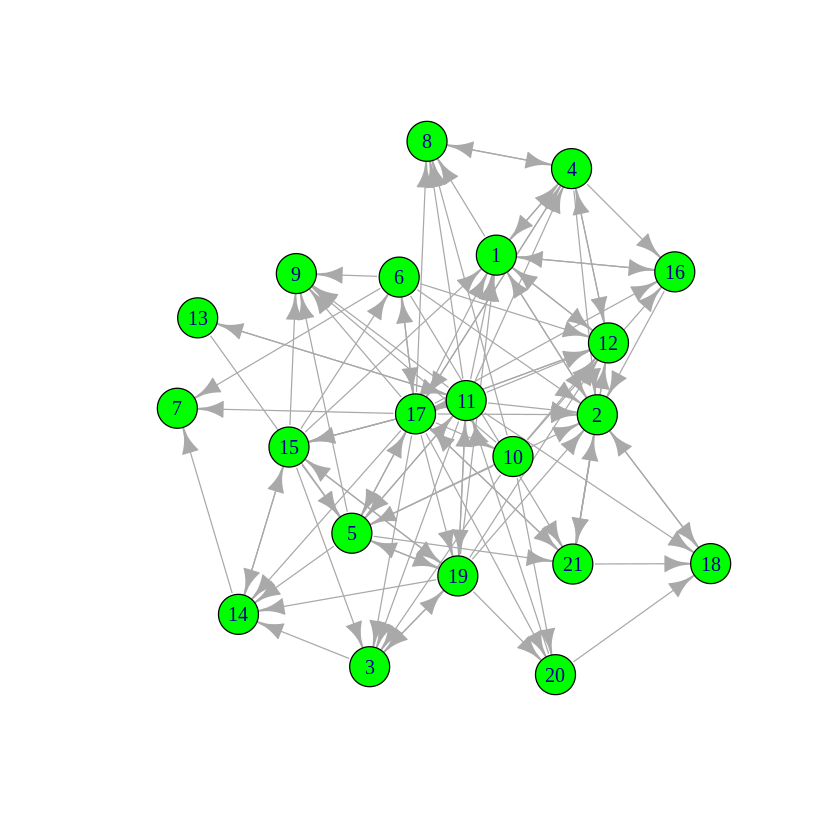

In [21]:
# par(mfrow = c(1,2))
gf <- graph_from_edgelist(edgelistf, directed = T)
layk <-layout_with_kk(gf)#The Kamada-Kawai layout algorithm
plot(gf, layout = layout_with_fr(gf), vertex.color="lightblue")#layout.fruchterman.reingold=T
plot(gf, layout = layk, vertex.color="green")

2.6. Вывести «описательную сводку» сети.

In [22]:
summary(net2, print.adj = FALSE)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 102 
   missing edges = 0 
   non-missing edges = 102 
 density = 0.2428571 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

2.7. Вычислить «пятичисловую сводку» сети:
> *   Вычислить размер сети
> *    Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
> *   Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.
> *   Вычислить диаметр сети. Сделать выводы
> *   Вычислить коэффициент кластеризации. Сделать выводы.


<br>

*Плотность*: $\frac{102}{A\binom{2}{21}} = 0.243...$
<br>

*Компоненты*: 3, состоящие из 1, 1 и 19 вершин(V7, V9 и остальные).

In [25]:
## Пятичисловая сводка:
## Размер
print("Размер сети:")
network.size(net2)

## Плотность 
print("Плотность:")
gden(net2)
print("Плотность входящих:")
denIn <- mean(degree(gf, mode = "in"))/20
denIn
print("Плотность исходящих:")
denOut <- mean(degree(gf, mode = "out"))/20
denOut

## Компоненты
com <-components(gf, mode = "strong")
print("Компоненты:")
com$no

## Диаметр сети
print("Диаметр сети через геодезическое расстояние:")
lgcf <- component.largest(net2, result = "graph")
gdf <- geodist(lgcf)
max(gdf$gdist)

print("Диаметр сети через встроенную функцию:")
diameter(g, directed = T)

# # ## Коэффициент кластеризации
print("Коэффициент кластеризации:")
gtrans(socioF)

[1] "Размер сети:"


[1] 21

[1] "Плотность:"


[1] 0.2428571

[1] "Плотность входящих:"


[1] 0.2428571

[1] "Плотность исходящих:"


[1] 0.2428571

[1] "Компоненты:"


[1] 3

[1] "Диаметр сети через геодезическое расстояние:"


[1] 5

[1] "Диаметр сети через встроенную функцию:"


[1] 5

[1] "Коэффициент кластеризации:"


[1] 0.4610526

**Вывод из пятичисловой сводки:**
<br>
Значение плотности  для встроенной функции, для исходящих и входящих рёбер совпадает, так как граф полный.

Из того, что в сети есть 3 компоненты сильной связности, причем две состоят из одного актора, следует, что есть два менеджера, которые дружат очень интересным способом, невзаимно.

Из того, что диаметр сети равен 5, что один менеджер "связан" с другим через не более чем через 5 посредников.

Только у 46% акторов есть транзитивная связь.

2.8. Вычислить среднюю степень узлов и дисперсию.

In [ ]:
## Cредняя степень узлов 
avgIn <- mean(degree(gf, mode = "in"))
avgOut<- mean(degree(gf, mode = "out"))

avgIn
avgOut

##  Дисперсия

DfIn <- sum((degree(gf, mode = "in") - avgIn)^2)/(gorder(gf))
DfIn

DfOut <-sum((degree(gf, mode = "out") - avgOut)^2)/(gorder(gf))
DfOut

[1] 4.857143

[1] 4.857143

[1] 4.693878

[1] 19.07483

Средняя степень узлов для исходящих и входящих одинаковая, так как граф полный. <br>
Дисперсия входящих узлов означает, что в среднем с каждым менеджером дружит с примерно 5 других менеджеров, а исходящих означает, что в среднем каждый менеджер дружит с примерно 19 другими менеджерами.

13. Заполнить таблицу для различных мер престижа:

| $n_i$ | $P_d$ |  $P_p$    |
|:-----:|:-----:|:---------:|
|    V1 |  0.40 | 0.6446429 |
|  V2 | 0.50 | 0.6685185 |
|    V3 |  0.25 | 0.4750000 |
|    V4 |  0.25 | 0.5308824 |
|    V5 |  0.30 | 0.4878378 |
|    V6 |  0.10 | 0.4011111 |
|    V7 |  0.15 | 0.4011111 |
|    V8 |  0.25 | 0.5308824 |
|    V9 |  0.30 | 0.4512500 |
|   V10 |  0.05 | 0.3610000 |
|   V11 |  0.30 | 0.4878378 |
|   V12 |  0.40 | 0.6016667 |
|   V13 |  0.05 | 0.3342593 |
|   V14 |  0.25 | 0.4628205 |
|   V15 |  0.20 | 0.4512500 |
|   V16 |  0.20 | 0.4878378 |
|   V17 |  0.30 | 0.5308824 |
|   V18 |  0.20 | 0.5157143 |
|   V19 |  0.25 | 0.4750000 |
|   V20 |  0.15 | 0.4297619 |
|   V21 |  0.25 | 0.5157143 |

In [ ]:
prest_deg <- prestige(net2, gmode="digraph", cmode="indegree")


gdf <- geodist(net2)

gdf <- gdf$gdist[which(rowSums(gdf$gdist) != Inf), ]
inp <- nrow(gdf)

#посчитали по формулке
prest_prox <- (inp^2)/((network.size(net2)-1)*colSums(gdf))

prest <- data.frame("n_i"= network.vertex.names(net2), "P_d" = prest_deg/(gorder(gf)-1), "P_p" = prest_prox)
prest

Cамым важным по степени является менеджер 2, а по близости - 17.  

## Выводы

С помощью математических пакетов и соответствующих библиотек был проведен анализ заданных сетей, вычислены описательные характеристики. Была изучена документация к билиотекам sna, network, igraph. 

<br>

---
<br>

В первой ненаправленной сети florentine_marital не так много связей между акторами, чтоследует из маленького значения плотности. Есть 2 компоненты, и из этого следует, что 15 семей прямо или косвенно связаны друг с другом. Pucci единственная ни с кем не связана.
<br>
Самым важным актором по всем параметрам является семья Medici.

<br>

---
<br>

Во второй направленной сети krackhardt_friendship среди 21 актора 19 находятся в одной компоненте сильной связности, т.е. имеют прямые или косвенные связи друг с другом, а еще 2 актора "изолированы" из-за своих странных пониманий термина дружбы.
<br>
У акторов данной сети, как правило, количество исходящих связей превышает количество входящих, так как есть два актора, которые "не дружат" обоюдно с другими.